In [16]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yousefsaeedian/financial-q-and-a-10k")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/financial-q-and-a-10k


In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import keras_nlp
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [18]:
df = pd.read_csv('/kaggle/input/financial-q-and-a-10k/Financial-QA-10k.csv')
df.head()

,question,answer,context,ticker,filing
0,What area did NVIDIA initially focus on before...,NVIDIA initially focused on PC graphics.,"Since our original focus on PC graphics, we ha...",NVDA,2023_10K
1,What are some of the recent applications of GP...,Recent applications of GPU-powered deep learni...,Some of the most recent applications of GPU-po...,NVDA,2023_10K
2,What significant invention did NVIDIA create i...,NVIDIA invented the GPU in 1999.,Our invention of the GPU in 1999 defined moder...,NVDA,2023_10K
3,How does NVIDIA's platform strategy contribute...,NVIDIA's platform strategy brings together har...,"NVIDIA has a platform strategy, bringing toget...",NVDA,2023_10K
4,What does NVIDIA's CUDA programming model enable?,NVIDIA's CUDA programming model opened the par...,With our introduction of the CUDA programming ...,NVDA,2023_10K


In [19]:
df.shape

(7000, 5)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  6998 non-null   object
 1   answer    6998 non-null   object
 2   context   6999 non-null   object
 3   ticker    7000 non-null   object
 4   filing    7000 non-null   object
dtypes: object(5)
memory usage: 273.6+ KB


In [21]:
df.isnull().sum()

question    2
answer      2
context     1
ticker      0
filing      0
dtype: int64

In [22]:
df.dropna(inplace = True)

In [23]:
df.duplicated().sum()

7

In [24]:
df.drop_duplicates(inplace = True)

In [25]:
df.shape

(6990, 5)

In [26]:
df.head()

,question,answer,context,ticker,filing
0,What area did NVIDIA initially focus on before...,NVIDIA initially focused on PC graphics.,"Since our original focus on PC graphics, we ha...",NVDA,2023_10K
1,What are some of the recent applications of GP...,Recent applications of GPU-powered deep learni...,Some of the most recent applications of GPU-po...,NVDA,2023_10K
2,What significant invention did NVIDIA create i...,NVIDIA invented the GPU in 1999.,Our invention of the GPU in 1999 defined moder...,NVDA,2023_10K
3,How does NVIDIA's platform strategy contribute...,NVIDIA's platform strategy brings together har...,"NVIDIA has a platform strategy, bringing toget...",NVDA,2023_10K
4,What does NVIDIA's CUDA programming model enable?,NVIDIA's CUDA programming model opened the par...,With our introduction of the CUDA programming ...,NVDA,2023_10K


In [27]:
le = LabelEncoder()

In [28]:
df['labels'] = le.fit_transform(df['answer'])

In [29]:
df.head()

,question,answer,context,ticker,filing,labels
0,What area did NVIDIA initially focus on before...,NVIDIA initially focused on PC graphics.,"Since our original focus on PC graphics, we ha...",NVDA,2023_10K,3453
1,What are some of the recent applications of GP...,Recent applications of GPU-powered deep learni...,Some of the most recent applications of GPU-po...,NVDA,2023_10K,3846
2,What significant invention did NVIDIA create i...,NVIDIA invented the GPU in 1999.,Our invention of the GPU in 1999 defined moder...,NVDA,2023_10K,3454
3,How does NVIDIA's platform strategy contribute...,NVIDIA's platform strategy brings together har...,"NVIDIA has a platform strategy, bringing toget...",NVDA,2023_10K,3465
4,What does NVIDIA's CUDA programming model enable?,NVIDIA's CUDA programming model opened the par...,With our introduction of the CUDA programming ...,NVDA,2023_10K,3460


In [30]:
X_ragged = tf.ragged.constant(df['question'].values)

In [31]:
X_tensor = tf.convert_to_tensor(X_ragged)

In [32]:
train_data = tf.data.Dataset.from_tensor_slices((X_tensor, df['labels'].values))

In [33]:
train_data = train_data.cache().shuffle(df.shape[0]).prefetch(tf.data.AUTOTUNE).batch(8)

In [34]:
tokenizer = keras_nlp.models.BertTokenizer.from_preset('bert_small_en_uncased')

In [35]:
preprocessor = keras_nlp.models.BertPreprocessor(
    tokenizer, sequence_length = 80, truncate = 'round_robin'
)

In [36]:
df['labels'].nunique()

6527

In [37]:
model = keras_nlp.models.BertClassifier.from_preset(
    'bert_small_en_uncased', preprocessor = preprocessor, num_classes = 6527
)

In [38]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-5),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

In [39]:
history = model.fit(train_data, epochs = 120)

Epoch 1/120
874/874 ━━━━━━━━━━━━━━━━━━━━ 61s 41ms/step - accuracy: 0.0014 - loss: 8.8272
Epoch 2/120
874/874 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.0063 - loss: 8.7969
Epoch 3/120
874/874 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.0089 - loss: 8.7148
Epoch 4/120
874/874 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.0099 - loss: 8.6245
Epoch 5/120
874/874 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.0138 - loss: 8.5219
Epoch 6/120
874/874 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.0155 - loss: 8.4456
Epoch 7/120
874/874 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.0244 - loss: 8.3403
Epoch 8/120
874/874 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.0242 - loss: 8.2699
Epoch 9/120
874/874 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.0396 - loss: 8.1749
Epoch 10/120
874/874 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.0466 - loss: 8.0894
Epoch 11/120
874/874 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.0565 - loss: 8.0049
Epoch 12/120
874/87

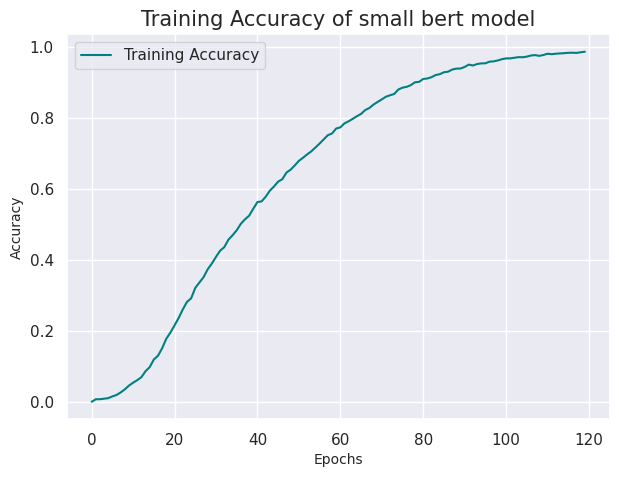

In [40]:
plt.figure(figsize = (7, 5))
plt.plot(history.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.title('Training Accuracy of small bert model', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.legend()
plt.show()

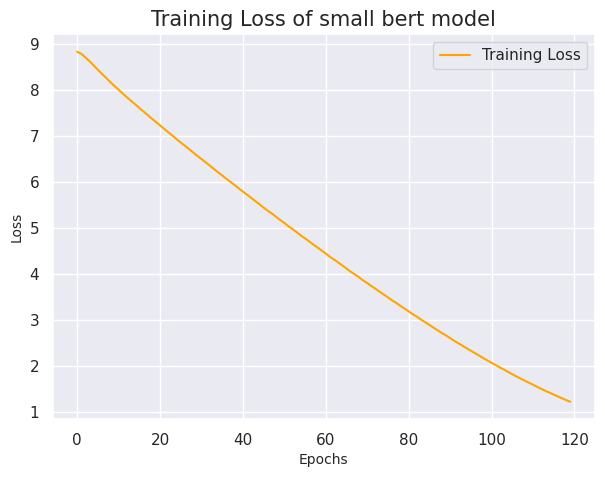

In [41]:
plt.figure(figsize = (7, 5))
plt.plot(history.history['loss'], label = 'Training Loss', color = 'orange')
plt.title('Training Loss of small bert model', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.legend()
plt.show()

In [42]:
df['question'][0]

'What area did NVIDIA initially focus on before expanding to other computationally intensive fields?'

In [43]:
df['answer'][0]

'NVIDIA initially focused on PC graphics.'

In [44]:
df['question'][1]

'What are some of the recent applications of GPU-powered deep learning as mentioned by NVIDIA?'

In [45]:
df['answer'][1]

'Recent applications of GPU-powered deep learning include recommendation systems, large language models, and generative AI.'

In [46]:
df['question'][2]

'What significant invention did NVIDIA create in 1999?'

In [47]:
df['answer'][2]

'NVIDIA invented the GPU in 1999.'

In [48]:
df['question'][3]

"How does NVIDIA's platform strategy contribute to the markets it serves?"

In [49]:
df['answer'][3]

"NVIDIA's platform strategy brings together hardware, systems, software, algorithms, libraries, and services to create unique value."

In [50]:
df['question'][4]

"What does NVIDIA's CUDA programming model enable?"

In [51]:
df['answer'][4]

"NVIDIA's CUDA programming model opened the parallel processing capabilities of GPUs for general purpose computing."

In [52]:
df['question'][5]

"What industries use NVIDIA's GPUs and software for automation?"

In [53]:
df['answer'][5]

"NVIDIA's GPUs and software are used for automation in various industries including transportation, healthcare, financial services, professional design, movies, and building products design."

In [55]:
while True:
    input_text = input('You: ')
    if input_text == 'finish':
        break
    else:
        input_ragged = tf.ragged.constant(input_text)
        input_tensor = tf.convert_to_tensor(input_ragged)
        pred = model.predict([input_tensor])
        y_pred = np.argmax(pred)
        print(le.inverse_transform([y_pred])[0])
        print('==============================================')

You:  What area did NVIDIA initially focus on before expanding to other computationally intensive fields?


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
NVIDIA initially focused on PC graphics.


You:  NVIDIA initially focus on what?


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
NVIDIA initially focused on PC graphics.


You:  What are some of the recent applications of GPU-powered deep learning as mentioned by NVIDIA?


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
Recent applications of GPU-powered deep learning include recommendation systems, large language models, and generative AI.


You:  the recent applications of GPU-powered deep learning as mentioned by NVIDIA?


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
Recent applications of GPU-powered deep learning include recommendation systems, large language models, and generative AI.


You:  What significant invention did NVIDIA create in 1999?


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
NVIDIA invented the GPU in 1999.


You:  What invention did NVIDIA create in 1999?


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
NVIDIA invented the GPU in 1999.


You:  What does NVIDIA's CUDA programming model enable?


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
NVIDIA's CUDA programming model opened the parallel processing capabilities of GPUs for general purpose computing.


You:  What does NVIDIA's CUDA


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
NVIDIA's CUDA programming model opened the parallel processing capabilities of GPUs for general purpose computing.


You:  finish
